# **Importing all the required packages**

In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from sklearn.model_selection import GridSearchCV
from sklearn import svm

from skimage.feature import hog
from skimage.color import rgb2grey
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import pickle

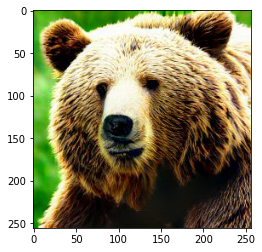

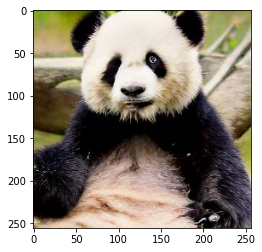

In [94]:
labels = pd.read_csv("labels.csv", index_col=0)

labels.head()

def get_image(row_id, root="/content/drive/MyDrive/PandavsBear/datasets/"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    /content/drive/MyDrive/PandavsBear/
    """
    filename = "{}.jpeg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

# subset the dataframe to just Apis (genus is 0.0) get the value of the sixth item in the index
apis_row = labels[labels.genus == 0.0].index[5]

# show the corresponding image of an Apis
plt.imshow(get_image(apis_row))
plt.show()

# subset the dataframe to just Bombus (genus is 1.0) get the value of the sixth item in the index
bombus_row = labels[labels.genus == 1.0].index[6]

plt.imshow(get_image(bombus_row))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
flat_data_arr=[]
target_arr=[]
Categories=['Pandas','Bears']
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/PandavsBear'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Pandas
loaded category:Pandas successfully
loading... category : Bears
loaded category:Bears successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.568901,0.702234,0.132863,0.532392,0.670118,0.097416,0.504739,0.660801,0.078641,0.485804,...,0.641603,0.552355,0.455492,0.566531,0.486783,0.372226,0.667736,0.592330,0.471403,0
1,0.364725,0.443646,0.111209,0.343325,0.429599,0.101809,0.334248,0.424592,0.100487,0.327011,...,0.268872,0.241421,0.170510,0.270450,0.242999,0.171025,0.301186,0.272839,0.201761,0
2,0.106270,0.500067,0.000000,0.117730,0.507879,0.000083,0.119213,0.497661,0.004573,0.153823,...,0.116332,0.128097,0.163391,0.104233,0.115997,0.151292,0.105260,0.117024,0.152318,0
3,0.548784,0.666431,0.150660,0.532627,0.650510,0.142327,0.516618,0.639249,0.139703,0.508677,...,0.721029,0.679722,0.408689,0.680910,0.662745,0.381333,0.696654,0.694137,0.407437,0
4,0.297785,0.437321,0.032250,0.300492,0.445673,0.043525,0.297245,0.445673,0.051539,0.293388,...,0.772477,0.713653,0.686202,0.778508,0.719684,0.692233,0.828951,0.770127,0.742676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.556176,0.721136,0.041300,0.524328,0.677034,0.019220,0.511546,0.657559,0.029925,0.516708,...,0.256418,0.070134,0.045271,0.268135,0.106478,0.038673,0.189067,0.052067,0.000000,1
96,0.721136,0.764273,0.544665,0.664354,0.715334,0.495727,0.644497,0.695477,0.475869,0.648521,...,0.017193,0.032288,0.036801,0.028214,0.042445,0.047822,0.036699,0.052385,0.056307,1
97,0.576057,0.662332,0.238802,0.508737,0.591090,0.179629,0.513725,0.596078,0.191510,0.520048,...,0.167909,0.157060,0.084903,0.187026,0.182869,0.071858,0.134657,0.134167,0.009839,1
98,0.708494,0.768214,0.298859,0.634201,0.705176,0.240145,0.614745,0.692853,0.240366,0.614115,...,0.000000,0.000000,0.010056,0.000000,0.000000,0.008993,0.002536,0.002536,0.008993,1


In [96]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [97]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Color bombus image has shape:  [[[146 165  24]
  [147 165  27]
  [143 164  25]
  ...
  [154 150  86]
  [153 153  89]
  [153 155  90]]

 [[146 164  26]
  [144 162  24]
  [139 160  21]
  ...
  [157 153  89]
  [154 155  89]
  [153 155  89]]

 [[146 164  26]
  [139 160  21]
  [136 157  20]
  ...
  [159 156  89]
  [154 155  87]
  [152 154  88]]

 ...

 [[187 164 132]
  [154 131  97]
  [161 137 101]
  ...
  [121 114 122]
  [118 111 119]
  [131 124 132]]

 [[177 154 122]
  [133 110  76]
  [152 128  92]
  ...
  [122 115 123]
  [ 99  92 100]
  [146 139 147]]

 [[184 161 129]
  [140 117  83]
  [171 147 111]
  ...
  [129 122 130]
  [133 126 134]
  [142 135 143]]]
Greyscale bombus image has shape:  [[0.59135843 0.59304    0.58633569 ... 0.57347294 0.58190431 0.58779804]
 [0.58911843 0.58127529 0.57064941 ... 0.58523765 0.58834863 0.58751529]
 [0.58911843 0.57064941 0.5594502  ... 0.59532078 0.58778314 0.58359373]
 ...
 [0.65325608 0.52327882 0.54707608 ... 0.45515412 0.44338941 0.4943698 ]
 [0.614

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  import sys


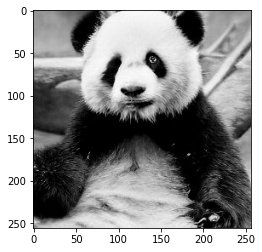

In [98]:
# load a bombus image using our get_image function and bombus_row from the previous cell
bombus = get_image(bombus_row)

print('Color bombus image has shape: ', bombus)

# convert the bombus image to greyscale
grey_bombus = rgb2grey(bombus)

plt.imshow(grey_bombus, cmap=mpl.cm.gray)

print('Greyscale bombus image has shape: ', grey_bombus)

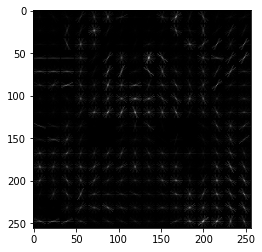

In [99]:
# run HOG using our greyscale bombus image
hog_features, hog_image = hog(grey_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(hog_image, cmap=mpl.cm.gray)

In [100]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack(color_features)
    return flat_features

bombus_features = create_features(bombus)

print(bombus_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """


[146 165  24 ... 142 135 143]


In [101]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        # load image
        img = get_image(img_id)
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """


In [102]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
bees_stand = ss.fit_transform(feature_matrix)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
bees_pca = ss.fit_transform(bees_stand)
# look at new shape
print('PCA matrix shape is: ', bees_pca.shape)

Feature matrix shape is:  (100, 196608)
PCA matrix shape is:  (100, 196608)


In [103]:
X = pd.DataFrame(bees_pca)
y = pd.Series(labels.genus.values)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=1234123)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

1    36
0    34
dtype: int64

In [104]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [105]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [106]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1])

Model accuracy is:  100.0%
Confusion Matrix



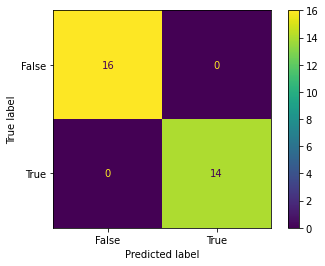

In [111]:
# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy*100 ,end ='%')
m = confusion_matrix(y_pred,y_test)
print("\nConfusion Matrix\n")
disp = ConfusionMatrixDisplay(confusion_matrix=m,display_labels=[False, True])
disp.plot()
plt.show()


In [112]:
c = classification_report(y_pred,y_test)
print(c)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



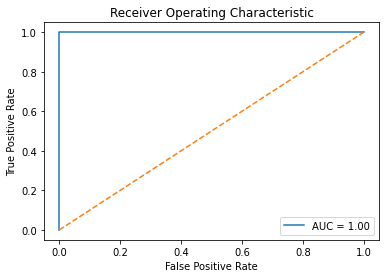

In [108]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Imagehttps://images.takeshape.io/86ce9525-f5f2-4e97-81ba-54e8ce933da7/dev/ddb4a492-e2be-4981-b8c6-7688c6efbfaa/Giant%20Panda%20eating%20bamboo%2C%20Chengdu%2C%20China%20dreamstime.jpeg?auto=compress%2Cformat&w=1200


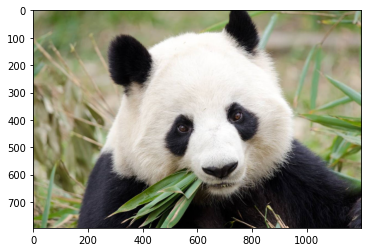

Pandas = 86.75991730765342%
Bears = 13.240082692346569%
The predicted image is : Pandas
Is the image a Pandas ?(y/n)
y
Thank you for your feedback


In [ ]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svm,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svm,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")

# cat = https://assets.petco.com/petco/image/upload/f_auto,q_auto/rabbit-care-sheet
# rabbit = https://c.ndtvimg.com/2020-08/h5mk7js_cat-generic_625x300_28_August_20.jpg?im=Resize=(1230,900)

# pandas = https://images.takeshape.io/86ce9525-f5f2-4e97-81ba-54e8ce933da7/dev/ddb4a492-e2be-4981-b8c6-7688c6efbfaa/Giant%20Panda%20eating%20bamboo%2C%20Chengdu%2C%20China%20dreamstime.jpeg?auto=compress%2Cformat&w=1200
# bear = https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0F4EOygIu_uxQwIs1DEain08FP57tERLOiw&usqp=CAU